# Handwritten Numbers Neural Network

This is a 3-layer neural network to indetify handwritten numbers that used the MNIST dataset of handwritten numbers. 

*code by Make Your Own Neural Network, Tariq Rashid, 2016*

In [100]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot as plt


# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
# learning rate
learning_rate = 0.2

# epochs is the number of times the training data set is used for training
epochs = 5


# What each end node means
output_nodes = 10
endnode = ["0","1","2","3","4","5","6","7","8","9","A"]


## Defining the Neural Network Class

This class represents a 3-layer neural network. 

- `__init__(self, inputnodes, hiddennodes, outputnodes, learningrate):` initializes the neural network
    - `inputnodes`(int) the number of nodes in the input layer
    - `hiddennodes`(int) the number of nodes in the hidden layer
    - `outputnodes`(int) the number of nodes in the output layer
    - `learningrate`(float) a value between 0-1 to represent the learning rate within each node
- `train(self, inputs_list, targets_list):` trains the neural net
    - `inputs_list`(list) a 2D list representing a vector of inputs
    - `targets_list`(list) a 2D list representing a vector of target values 
- `query(self, inputs_list):` queries the neural network
    - `inputs_list`(list) a 2D list representing a vector of inputs

In [101]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [110]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

for x in range(len(training_data_list)):
    line = training_data_list[x].strip().split(",")
    for i in range(len(line)-1):
        if int(line[i+1]) != 255:
            line[i+1] = "0"
    text = "".join(i+"," for i in line)
    training_data_list[x] = text[:-1]

In [ ]:
# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

# train the neural network


for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas

        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        pos = endnode.index(str(all_values[0]))
        print(pos,record)
        targets[int(pos)-1] = .99
        n.train(inputs, targets)
        pass
    pass

10 A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,0,255,0,0,0,0,255,0,0,0,0,255,0,0,0,0,255,0,0,0,0,255,0,0,0,255,255,255,255,0,0,0,0,255,0,0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0,0,255,0,0,0,255,255,255,255,0,0,0


ValueError: shapes (200,784) and (163,1) not aligned: 784 (dim 1) != 163 (dim 0)

# Drawing

In [99]:
from tkinter import Tk,Canvas,EventType
array = numpy.zeros((28,28))

window = Tk()
size = int(window.winfo_screenheight()/2)
cansize = size-10
window.minsize(size,size)
window.config(background="#000000")

canvas = Canvas(window,background="#AAAAAA",width=cansize,height=cansize)
canvas.place(x=5,y=5)

rxsize = cansize/len(array[0])
rysize = cansize/len(array)

lc = False
def on_click(event): 
    global lc
    lc = event.type == EventType.ButtonPress

window.bind('<ButtonPress-1>', on_click)
window.bind('<ButtonRelease-1>', on_click)

try:
    while True:
        x,y = window.winfo_pointerxy()
        wx, wy = window.winfo_x(),window.winfo_y()
        cx1, cy1 = wx+5, wy+5
        cx2, cy2 = cx1+cansize, cy1+cansize
        incan = x >= cx1 and x <= cx2 and y >= cy1 and y <= cy2

        canvas.delete("all")
        for r in range(len(array)):
            for c in range(len(array[r])):
                x1 = c*rxsize
                y1 = r*rysize
                x2 = (c*rxsize)+rxsize
                y2 = (r*rysize)+rysize

                px1, py1 = cx1+x1, cy1+y1
                px2, py2 = cx1+x2, cy1+y2
                inpix = incan and x >= px1 and x <= px2 and y >= py1 and y <= py2

                if inpix and lc:
                    array[r][c] = 1
                
                fill = "#FFFFFF"
                if array[r][c]:
                    fill = "#000000"

                canvas.create_rectangle(x1,y1,x2,y2,outline="",fill=fill)

        window.update()
except:
    pass

[[2.09911324e-02]
 [1.91011553e-04]
 [3.97266533e-02]
 [4.30671245e-03]
 [1.34205411e-01]
 [6.53959612e-02]
 [7.35208206e-01]
 [3.13632329e-03]
 [5.00576508e-03]
 [6.37133028e-03]]
6


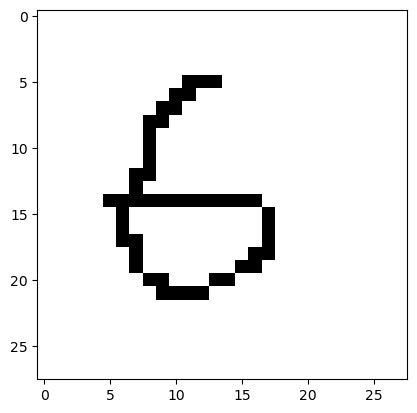

In [ ]:
image = numpy.asfarray(array)
inputs = numpy.asfarray(array.flatten())
outputs = n.query(inputs)
label = numpy.argmax(outputs)

plt.imshow(image,cmap="Greys",interpolation="None")
print(outputs)
print(endnode[label])

In [122]:
array = numpy.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,255,0,0,0,255,0,0,0,0,255,0,0,0,0,255,0,0,0,255,255,0,0,0,0,255,0,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0,0,255,255,255,255,0,0,0,0,0,0,255,255,255,255,0,0,0,0,255,0,0,0,255,0,0,0,255,0,0,0,0,255,0,0,0,255,0,0,0,255])
array = array.reshape(28,28)
# image = numpy.asfarray(array)
plt.imshow(array,cmap="Greys",interpolation="None")

ValueError: cannot reshape array of size 156 into shape (28,28)